**Import Libraries**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

**Load Dataset**

In [90]:
data = pd.read_csv('Mall_Customers.csv')

In [68]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [71]:
data.duplicated().sum()

0

**Data Visualization**

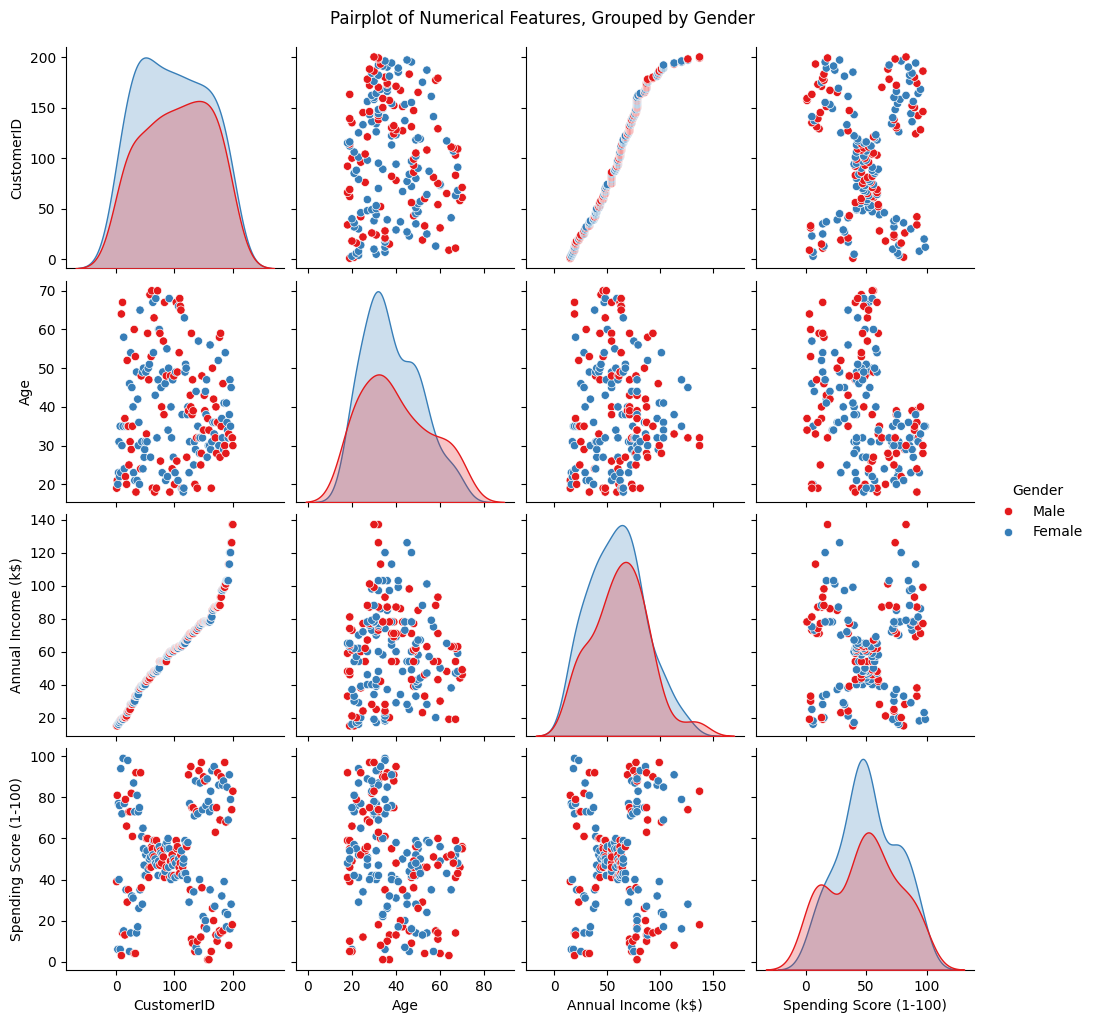

In [72]:
# Pairplot to visualize relationships between numerical features, grouped by gender
sns.pairplot(data, hue='Gender', palette='Set1')
plt.suptitle('Pairplot of Numerical Features, Grouped by Gender', y=1.02)
plt.show()


<ipython-input-73-d8cde2966ad1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=data, palette='Set1')


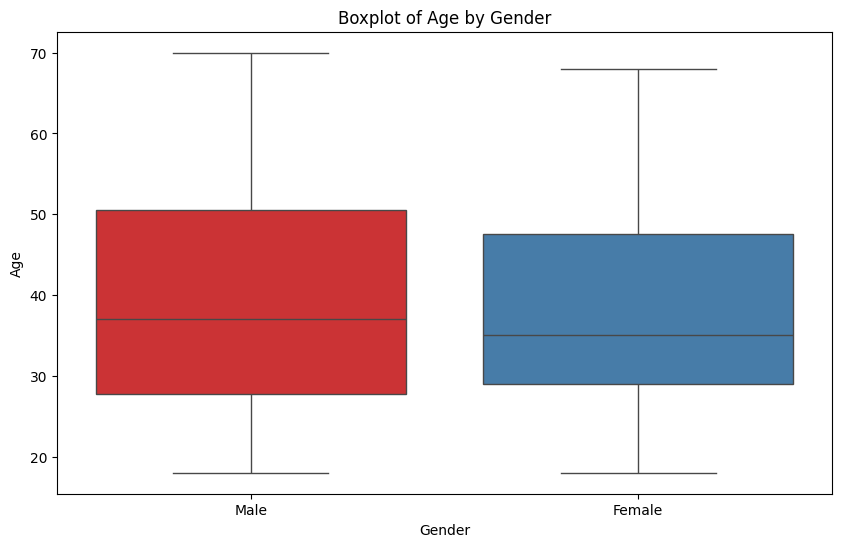

In [73]:
# Boxplot of Age by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=data, palette='Set1')
plt.title('Boxplot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

<ipython-input-74-ecd5cdbab642>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, palette='Set1')


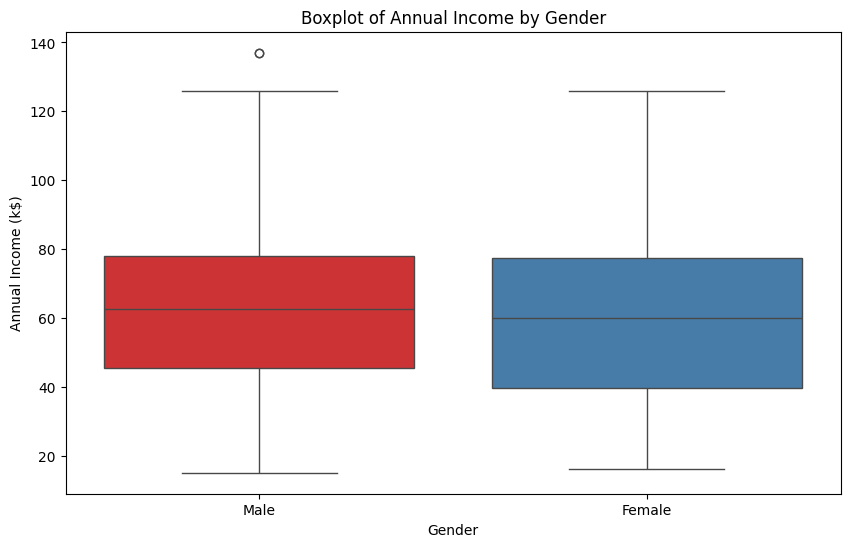

In [74]:
# Boxplot of Annual Income by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, palette='Set1')
plt.title('Boxplot of Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()


<ipython-input-75-c68bcbe8017d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, palette='Set1')


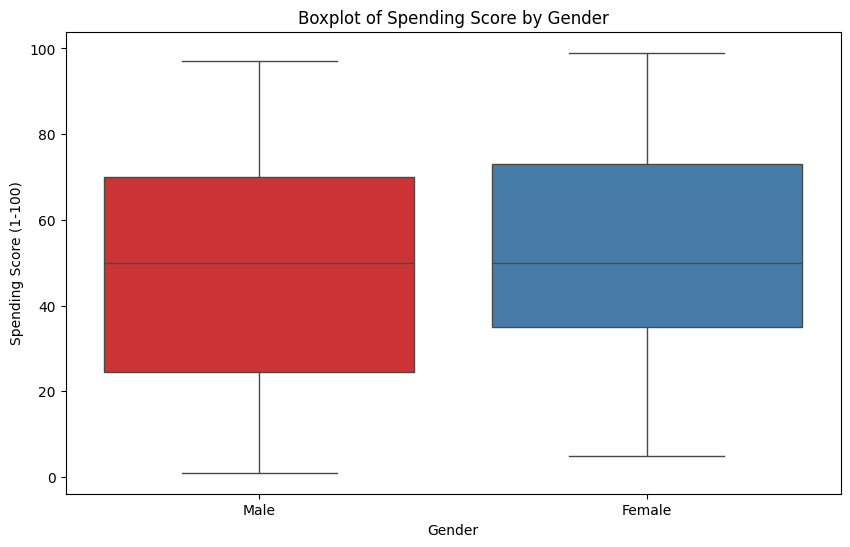

In [75]:
# Boxplot of Spending Score by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, palette='Set1')
plt.title('Boxplot of Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Feature Selection**

In [91]:
# Drop unnecessary columns (CustomerID is not needed for clustering)
data.drop(['CustomerID', 'Age'], axis=1, inplace=True)

# Data Preprocessing
# Encode Gender column (1 for Male, 0 for Female)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.drop('Gender', axis=1, inplace=True)


In [92]:
# Feature Selection
# We'll use 'Annual Income (k$)', and 'Spending Score (1-100)' as our features for clustering
features = [ 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [93]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Apply Elbow Method to determine the optimal number of clusters**

In [94]:
# Elbow Method to determine the optimal number of clusters
wcss = []  # Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

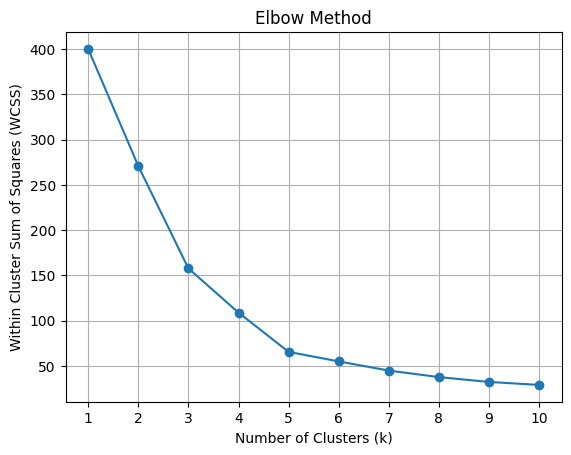

In [95]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

**Apply K-means clustering algorithm**

In [96]:
# Choose the optimal number of clusters based on the elbow method (let's say k=5)
optimal_k = 5

# Apply K-means clustering algorithm with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels
data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


**Visualize the clusters in 2D & 3D**

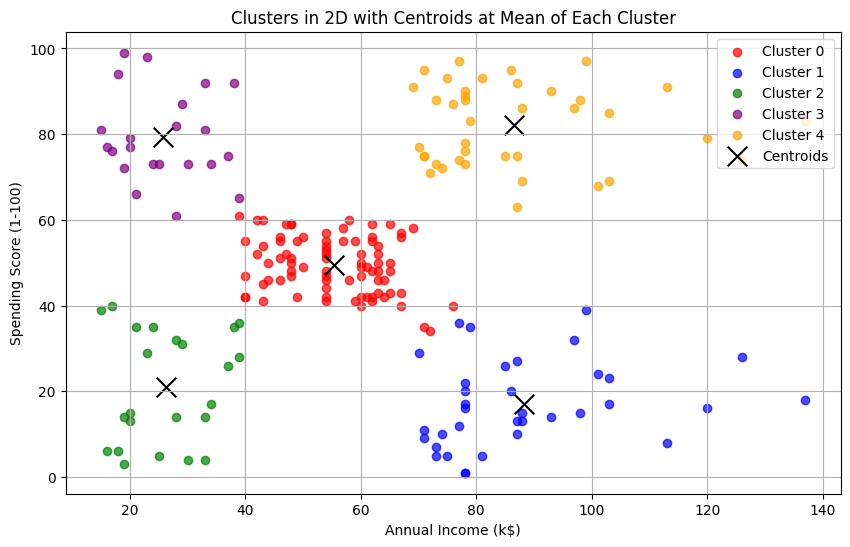

In [103]:
# Visualize the clusters in 2D with centroids placed at the mean of each cluster
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for cluster in range(5):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])

# Plot centroids at the mean of each cluster
for cluster in range(5):
    centroid = cluster_means.loc[cluster, ['Annual Income (k$)', 'Spending Score (1-100)']]
    plt.scatter(centroid[0], centroid[1], marker='x', s=200, c='black')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters in 2D with Centroids at Mean of Each Cluster')
# Legend for data points only
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Centroids'], loc='upper right')
plt.grid(True)
plt.show()


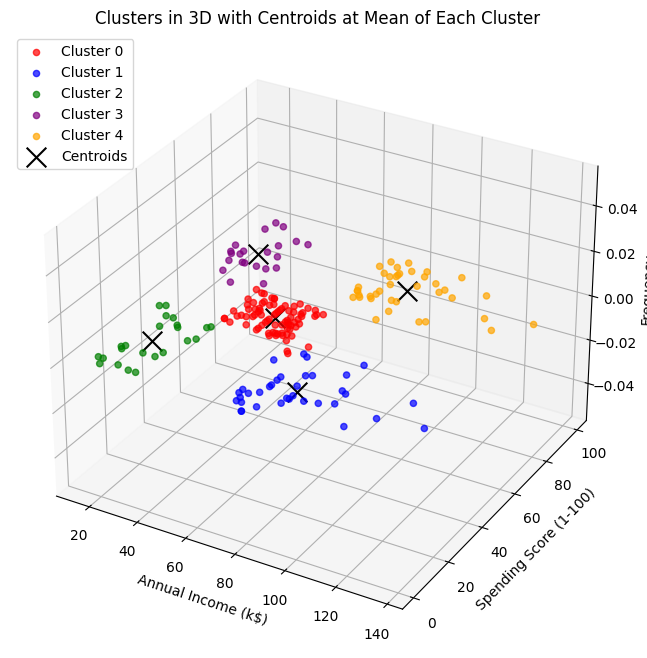

In [105]:
# Visualize the clusters in 3D with centroids placed at the mean of each cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'purple', 'orange']
for cluster in range(5):
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])

# Plot centroids at the mean of each cluster
for cluster in range(5):
    centroid = cluster_means.loc[cluster, ['Annual Income (k$)', 'Spending Score (1-100)']]
    ax.scatter(centroid[0], centroid[1], marker='x', s=200, c='black')

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Frequency')
ax.set_title('Clusters in 3D with Centroids at Mean of Each Cluster')
# Legend for data points only
ax.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Centroids'], loc='upper left')
plt.grid(True)
plt.show()
